# Wisconsin

## Issue from BEA Income Data:

> Shawano, WI and Menominee, WI are combined as Shawano (incl. Menominee), WI for the years prior to 1989.


### Approach

Combine Shawano and Menominee into one record.

In [1]:
import pandas
import geopandas
%matplotlib inline

In [2]:

csv = pandas.read_csv('55.csv')

In [3]:
csv.head()

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,9276,"""55000""",Wisconsin,3,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,16424603,...,219514508,215913287,221895293,234574850,245700352,247127445,257572422,268237980,273787486,283635828
1,9277,"""55000""",Wisconsin,3,CAINC1,2,...,Population (persons) 1/,Number of persons,4378000,...,5640996,5669264,5690403,5705812,5721075,5736673,5751272,5759744,5772917,5795483
2,9278,"""55000""",Wisconsin,3,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,3752,...,38914,38085,38995,41112,42947,43079,44785,46571,47426,48941
3,9279,"""55001""","Adams, WI",3,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,22995,...,584851,598851,610958,647126,672207,677315,690438,717115,723620,753940
4,9280,"""55001""","Adams, WI",3,CAINC1,2,...,Population (persons) 1/,Number of persons,8875,...,21101,20930,20886,20778,20426,20419,20135,20032,19997,19973


In [4]:
csv[csv.GeoName.str.startswith('Shawano')]

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
177,9453,"""55115""","Shawano, WI*",3,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,(NA),...,1321825,1293779,1354850,1418767,1460468,1486023,1547953,1577052,1598211,1652000
178,9454,"""55115""","Shawano, WI*",3,CAINC1,2,...,Population (persons) 1/,Number of persons,(NA),...,41894,41889,41937,41663,41504,41409,41344,41053,40941,40935
179,9455,"""55115""","Shawano, WI*",3,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,(NA),...,31552,30886,32307,34053,35189,35886,37441,38415,39037,40357
219,9495,"""55901""","Shawano (includes Menominee), WI*",3,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,87148,...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)
220,9496,"""55901""","Shawano (includes Menominee), WI*",3,CAINC1,2,...,Population (persons) 1/,Number of persons,37033,...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)
221,9497,"""55901""","Shawano (includes Menominee), WI*",3,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,2353,...,(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA),(NA)


In [5]:
csv[csv.GeoName.str.startswith('Menominee')]

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
120,9396,"""55078""","Menominee, WI*",3,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,(NA),...,94487,104406,108166,110847,115973,120709,122552,132578,130431,132733
121,9397,"""55078""","Menominee, WI*",3,CAINC1,2,...,Population (persons) 1/,Number of persons,(NA),...,4214,4191,4268,4369,4358,4367,4491,4510,4537,4615
122,9398,"""55078""","Menominee, WI*",3,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,(NA),...,22422,24912,25343,25371,26612,27641,27288,29396,28748,28761


In [6]:
csv = csv.replace('(NA)', 0)

In [7]:
menominee = csv.iloc[[120, 121, 122]]
shawano = csv.iloc[[177, 178, 179]]
combined = csv.iloc[[219, 220, 221]]

In [8]:
years = [str(y) for y in range(1989, 2018)]

In [9]:
menominee[years] = menominee[years].astype(int)
shawano[years] = shawano[years].astype(int)
combined[years] = combined[years].astype(int)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
cindex = [ combined.columns.values.tolist().index(y) for y in years]

for c,y in zip(cindex,years):
    #print(menominee[y].dtype)
    #print(shawano[y].dtype)
    #print(combined[y].dtype)
    combined.iloc[0,c] = menominee.iloc[0,c] + shawano.iloc[0,c]
    combined.iloc[1,c] = menominee.iloc[1,c] + shawano.iloc[1,c]
    combined.iloc[2,c] = int(combined.iloc[0,c]*1000/ combined.iloc[1,c])
    csv.iloc[219,c] = combined.iloc[0,c]
    csv.iloc[220,c] = combined.iloc[1,c]
    csv.iloc[221,c] = combined.iloc[2,c]




/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [11]:
combined

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
219,9495,"""55901""","Shawano (includes Menominee), WI*",3,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,87148,...,1416312,1398185,1463016,1529614,1576441,1606732,1670505,1709630,1728642,1784733
220,9496,"""55901""","Shawano (includes Menominee), WI*",3,CAINC1,2,...,Population (persons) 1/,Number of persons,37033,...,46108,46080,46205,46032,45862,45776,45835,45563,45478,45550
221,9497,"""55901""","Shawano (includes Menominee), WI*",3,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,2353,...,30717,30342,31663,33229,34373,35099,36446,37522,38010,39181


In [12]:
csv.iloc[[219,220,221]]

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
219,9495,"""55901""","Shawano (includes Menominee), WI*",3,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,87148,...,1416312,1398185,1463016,1529614,1576441,1606732,1670505,1709630,1728642,1784733
220,9496,"""55901""","Shawano (includes Menominee), WI*",3,CAINC1,2,...,Population (persons) 1/,Number of persons,37033,...,46108,46080,46205,46032,45862,45776,45835,45563,45478,45550
221,9497,"""55901""","Shawano (includes Menominee), WI*",3,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,2353,...,30717,30342,31663,33229,34373,35099,36446,37522,38010,39181


## Drop shawano and menomiee from csv

In [13]:
drop_ids = [120, 121, 122, 177, 178, 179]
csv = csv.drop(drop_ids)

In [14]:
years = [str(y) for y in range(1969, 2018)]
csv[years] = csv[years].astype(int)

In [15]:
for year in range(1969,2018):
    print(csv[str(year)].dtype)
    

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64


## Dissolve shawano and menominee geometries in gdf

dissolve
and assign geofips

In [16]:
gdf = geopandas.read_file("zip:tl_2019_us_county.zip!tl_2019_us_county.shp")

In [17]:
wisconsin_gdf = gdf[gdf.STATEFP=="55"]

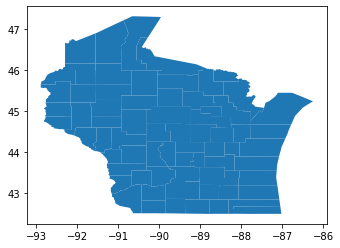

In [18]:
wisconsin_gdf.plot()

In [19]:
wisconsin_gdf[wisconsin_gdf.NAME=='Shawano']

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1915,55,115,01581117,55115,Shawano,Shawano County,06,H1,G4020,267,43020,None,A,2313441748,41883060,+44.7896407,-088.7558134,"POLYGON ((-89.224008 44.856265, -89.224008 44...."


In [20]:
wisconsin_gdf[wisconsin_gdf.NAME=='Menominee']

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
3133,55,078,01581099,55078,Menominee,Menominee County,06,H1,G4020,267,43020,None,A,926217566,19022479,+44.9913041,-088.6692512,"POLYGON ((-88.98245999999999 45.117998, -88.98..."


In [21]:
combined = wisconsin_gdf[wisconsin_gdf.COUNTYFP.isin(['115', '078'])].dissolve(by='STATEFP')

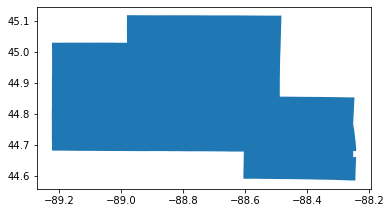

In [22]:
combined.plot()

In [23]:
combined.head()

,geometry,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
STATEFP,,,,,,,,,,,,,,,,,
55,"POLYGON ((-89.224008 44.856265, -89.224008 44....",115,01581117,55115,Shawano,Shawano County,06,H1,G4020,267,43020,None,A,2313441748,41883060,+44.7896407,-088.7558134


In [24]:
combined['NAME'] = "Shawano+Menominee"
combined['NAMELSAD'] = "Shawano+Menominee Counties"

In [25]:
combined.head()

,geometry,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
STATEFP,,,,,,,,,,,,,,,,,
55,"POLYGON ((-89.224008 44.856265, -89.224008 44....",115,01581117,55115,Shawano+Menominee,Shawano+Menominee Counties,06,H1,G4020,267,43020,None,A,2313441748,41883060,+44.7896407,-088.7558134


In [26]:
combined['GEOID'] = '55901'

In [27]:
combined.head()

,geometry,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
STATEFP,,,,,,,,,,,,,,,,,
55,"POLYGON ((-89.224008 44.856265, -89.224008 44....",115,01581117,55901,Shawano+Menominee,Shawano+Menominee Counties,06,H1,G4020,267,43020,None,A,2313441748,41883060,+44.7896407,-088.7558134


In [28]:
wisc0 = wisconsin_gdf[~wisconsin_gdf.COUNTYFP.isin(['115', '078'])]

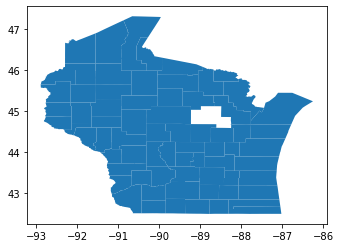

In [29]:
wisc0.plot()

In [30]:
wisc1 = pandas.concat([wisc0, combined])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


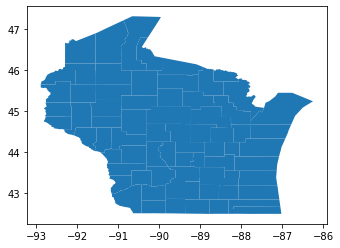

In [31]:
wisc1.plot()

In [32]:
wisc1.head()

,ALAND,AWATER,CBSAFP,CLASSFP,COUNTYFP,COUNTYNS,CSAFP,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,LSAD,METDIVFP,MTFCC,NAME,NAMELSAD,STATEFP,geometry
16,2153685971,45692999,12660,H1,111,01581115,357,A,55111,+43.4280010,-089.9433184,06,None,G4020,Sauk,Sauk County,55,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
145,1486700515,48452318,33460,H1,093,01581107,378,A,55093,+44.7253365,-092.4262793,06,None,G4020,Pierce,Pierce County,55,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."
155,1170076618,73110198,29100,H1,063,01581091,None,A,55063,+43.9082222,-091.1117584,06,None,G4020,La Crosse,La Crosse County,55,"POLYGON ((-91.347741 43.911964, -91.348743 43...."
161,2201905281,35570217,32860,H1,033,01581076,232,A,55033,+44.9477513,-091.8976451,06,None,G4020,Dunn,Dunn County,55,"POLYGON ((-92.135379 44.944807, -92.135378 44...."
171,2558687761,32538303,None,H1,053,01581086,None,A,55053,+44.3245897,-090.7995104,06,None,G4020,Jackson,Jackson County,55,"POLYGON ((-91.166006 44.335102, -91.166004 44...."


In [33]:
wisc1.shape

(71, 18)

In [34]:
wisconsin_gdf.shape

(72, 18)

## Merge gdf and csv

In [35]:
csv['GeoFIPS'] = [fip.strip().replace("\"", "") for fip in csv.GeoFIPS]


In [36]:
wisc1.head()

,ALAND,AWATER,CBSAFP,CLASSFP,COUNTYFP,COUNTYNS,CSAFP,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,LSAD,METDIVFP,MTFCC,NAME,NAMELSAD,STATEFP,geometry
16,2153685971,45692999,12660,H1,111,01581115,357,A,55111,+43.4280010,-089.9433184,06,None,G4020,Sauk,Sauk County,55,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
145,1486700515,48452318,33460,H1,093,01581107,378,A,55093,+44.7253365,-092.4262793,06,None,G4020,Pierce,Pierce County,55,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."
155,1170076618,73110198,29100,H1,063,01581091,None,A,55063,+43.9082222,-091.1117584,06,None,G4020,La Crosse,La Crosse County,55,"POLYGON ((-91.347741 43.911964, -91.348743 43...."
161,2201905281,35570217,32860,H1,033,01581076,232,A,55033,+44.9477513,-091.8976451,06,None,G4020,Dunn,Dunn County,55,"POLYGON ((-92.135379 44.944807, -92.135378 44...."
171,2558687761,32538303,None,H1,053,01581086,None,A,55053,+44.3245897,-090.7995104,06,None,G4020,Jackson,Jackson County,55,"POLYGON ((-91.166006 44.335102, -91.166004 44...."


In [37]:
wisc1.STATEFP='55'

In [38]:
data = csv

In [39]:
data.head()

,Unnamed: 0,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,9276,55000,Wisconsin,3,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,16424603,...,219514508,215913287,221895293,234574850,245700352,247127445,257572422,268237980,273787486,283635828
1,9277,55000,Wisconsin,3,CAINC1,2,...,Population (persons) 1/,Number of persons,4378000,...,5640996,5669264,5690403,5705812,5721075,5736673,5751272,5759744,5772917,5795483
2,9278,55000,Wisconsin,3,CAINC1,3,...,Per capita personal income (dollars) 2/,Dollars,3752,...,38914,38085,38995,41112,42947,43079,44785,46571,47426,48941
3,9279,55001,"Adams, WI",3,CAINC1,1,...,Personal income (thousands of dollars),Thousands of dollars,22995,...,584851,598851,610958,647126,672207,677315,690438,717115,723620,753940
4,9280,55001,"Adams, WI",3,CAINC1,2,...,Population (persons) 1/,Number of persons,8875,...,21101,20930,20886,20778,20426,20419,20135,20032,19997,19973


In [40]:
data['GEOID'] = data.GeoFIPS

In [41]:
data.GEOID

0      55000
1      55000
2      55000
3      55001
4      55001
       ...  
217    55141
218    55141
219    55901
220    55901
221    55901
Name: GEOID, Length: 216, dtype: object

## gdf records missing income values

In [42]:
#data = data[data.LineCode==3]
merged_gdf = wisc1.merge(data, on='GEOID')

In [43]:
set(wisc1.GEOID)

{'55001',
 '55003',
 '55005',
 '55007',
 '55009',
 '55011',
 '55013',
 '55015',
 '55017',
 '55019',
 '55021',
 '55023',
 '55025',
 '55027',
 '55029',
 '55031',
 '55033',
 '55035',
 '55037',
 '55039',
 '55041',
 '55043',
 '55045',
 '55047',
 '55049',
 '55051',
 '55053',
 '55055',
 '55057',
 '55059',
 '55061',
 '55063',
 '55065',
 '55067',
 '55069',
 '55071',
 '55073',
 '55075',
 '55077',
 '55079',
 '55081',
 '55083',
 '55085',
 '55087',
 '55089',
 '55091',
 '55093',
 '55095',
 '55097',
 '55099',
 '55101',
 '55103',
 '55105',
 '55107',
 '55109',
 '55111',
 '55113',
 '55117',
 '55119',
 '55121',
 '55123',
 '55125',
 '55127',
 '55129',
 '55131',
 '55133',
 '55135',
 '55137',
 '55139',
 '55141',
 '55901'}

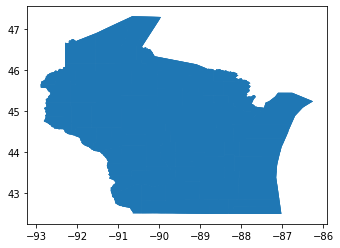

In [44]:
merged_gdf.plot()

In [45]:
merged_gdf.head()

,ALAND,AWATER,CBSAFP,CLASSFP,COUNTYFP,COUNTYNS,CSAFP,FUNCSTAT,GEOID,INTPTLAT,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,2153685971,45692999,12660,H1,111,01581115,357,A,55111,+43.4280010,...,2162156,2130031,2247789,2365214,2495867,2553889,2688269,2800980,2832908,2933322
1,2153685971,45692999,12660,H1,111,01581115,357,A,55111,+43.4280010,...,61231,61562,62072,62272,62415,62818,63005,63292,63604,63981
2,2153685971,45692999,12660,H1,111,01581115,357,A,55111,+43.4280010,...,35311,34600,36213,37982,39988,40655,42668,44255,44540,45847
3,1486700515,48452318,33460,H1,093,01581107,378,A,55093,+44.7253365,...,1428373,1372977,1429277,1529395,1592435,1605327,1706776,1785974,1801618,1870308
4,1486700515,48452318,33460,H1,093,01581107,378,A,55093,+44.7253365,...,40758,40613,41065,40873,40705,40778,41003,41020,41428,41901


In [46]:
merged_gdf.shape[0]/3

71.0

In [47]:
matched_names = set(merged_gdf.NAMELSAD)

In [48]:
matched_names

{'Adams County',
 'Ashland County',
 'Barron County',
 'Bayfield County',
 'Brown County',
 'Buffalo County',
 'Burnett County',
 'Calumet County',
 'Chippewa County',
 'Clark County',
 'Columbia County',
 'Crawford County',
 'Dane County',
 'Dodge County',
 'Door County',
 'Douglas County',
 'Dunn County',
 'Eau Claire County',
 'Florence County',
 'Fond du Lac County',
 'Forest County',
 'Grant County',
 'Green County',
 'Green Lake County',
 'Iowa County',
 'Iron County',
 'Jackson County',
 'Jefferson County',
 'Juneau County',
 'Kenosha County',
 'Kewaunee County',
 'La Crosse County',
 'Lafayette County',
 'Langlade County',
 'Lincoln County',
 'Manitowoc County',
 'Marathon County',
 'Marinette County',
 'Marquette County',
 'Milwaukee County',
 'Monroe County',
 'Oconto County',
 'Oneida County',
 'Outagamie County',
 'Ozaukee County',
 'Pepin County',
 'Pierce County',
 'Polk County',
 'Portage County',
 'Price County',
 'Racine County',
 'Richland County',
 'Rock County',
 'R

In [49]:
missing_gdf = wisc1[~wisc1.GEOID.isin(merged_gdf.GEOID)]

In [50]:
missing_names = set(missing_gdf.NAMELSAD)

In [51]:
missing_names

set()

In [52]:
missing_gdf.head()

,ALAND,AWATER,CBSAFP,CLASSFP,COUNTYFP,COUNTYNS,CSAFP,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,LSAD,METDIVFP,MTFCC,NAME,NAMELSAD,STATEFP,geometry


In [53]:
usva = geopandas.read_file('usva.shp')

In [54]:
us_no_wisc = usva[usva.STATEFP!='55']

In [55]:
us = pandas.concat([merged_gdf, us_no_wisc])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [56]:
us.shape

(9240, 76)

In [57]:
9098/3

3032.6666666666665

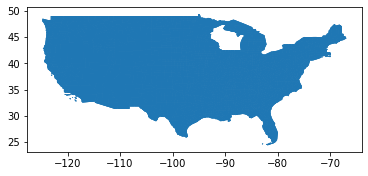

In [58]:
us_no_wisc.plot()

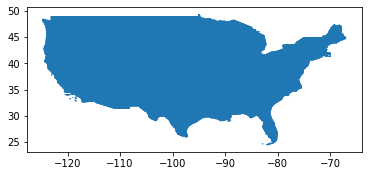

In [59]:
us.plot()

In [60]:
us.shape

(9240, 76)

In [61]:
9240/3

3080.0

In [62]:
us.head()

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,METDIVFP,MTFCC,NAME,NAMELSAD,Region,STATEFP,TableName,Unit,Unnamed: 0,geometry
0,148926,154820,164182,177909,200349,208954,232188,250796,285130,317742,...,None,G4020,Sauk,Sauk County,3,55,CAINC1,Thousands of dollars,9447.0,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
1,38212,39021,39247,40037,40867,41030,42132,42114,42490,42491,...,None,G4020,Sauk,Sauk County,3,55,CAINC1,Number of persons,9448.0,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
2,3897,3968,4183,4444,4902,5093,5511,5955,6711,7478,...,None,G4020,Sauk,Sauk County,3,55,CAINC1,Dollars,9449.0,"POLYGON ((-90.191964 43.554996, -90.196759 43...."
3,91916,100258,106854,116383,132623,143709,155120,173709,198952,221278,...,None,G4020,Pierce,Pierce County,3,55,CAINC1,Thousands of dollars,9420.0,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."
4,26277,26865,27818,28406,28683,28815,29272,29764,30474,30450,...,None,G4020,Pierce,Pierce County,3,55,CAINC1,Number of persons,9421.0,"POLYGON ((-92.694542 44.68874, -92.694659 44.6..."


In [63]:
for y in range(1969, 2018):
    print(us[str(y)].dtype)

object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64


In [64]:
us.to_file('usincome.shp')